単純パーセプトロンとは、学習データをクラス1かクラス2（1か0）のどちらかに分類するアルゴリズム。
このような分類方法を「2クラス分類」（2値分類）という。

単純パーセプトロンは、入力に対する出力が教師データと異なる場合、「重み」を変更してから次の入力に進む。
もし、出力が教師データと一致した場合、重みはそのまま。
これを繰り返して、最適な重みを見つける。

実際の計算では、重みに「バイアス」という値を加えて、重みを特定の方向に偏らせることができる。
このバイアス値も、学習中に調整される。

活性化関数は、入力信号の総和がいくつになったら出力するのかを決める関数。
一般的に、単純パーセプトロンは1か0を出力するので、「ステップ関数」が使われる。

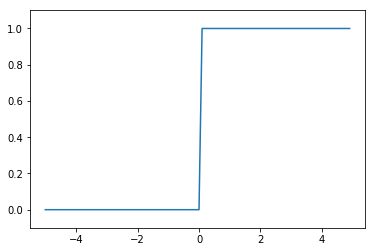

In [2]:
# ステップ関数
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-5.0, 5.0, 0.1)
y = np.array(x > 0)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

クラス1とクラス2を2分する直線を「決定境界」、直線でクラスを分割できることを「線形分離可能」という。
決定境界の直線を引くには、「重みベクトル係数」を求める必要がある。

重みベクトル係数を求めるには、まず直線を境にして正の側、負の側に分ける。
正の側、負の側にあるのかを判断する関数を「識別関数」と言う。
決定境界を「識別面」と呼ぶ。
次に、負の側のデータを正の側に反転移動する。
反転移動しても決定境界自体に影響はない。
つまり「重みベクトルを法線ベクトルとする直線」を求めれば良いことになる。

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], test_size=0.3, random_state=0)

In [5]:
# データを正規化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [8]:
# パラメータ eta0：一度にどれくらい傾かせるかを決める値。
#                  この値が小さいほど、最適値に到達しやすくなる。
#                  ただし、一度に傾く量がわずかだと、試行回数が増えて処理が遅くなる。

from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter=100, eta0=0.1, random_state=0, shuffle=True)

In [10]:
ppn.fit(x_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      max_iter=100, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [12]:
# 予測精度
y_pred = ppn.predict(x_test)
import numpy as np
np.mean(y_pred == y_test)

0.9777777777777777

In [15]:
# 誤分類した数
print('誤分類:%d' % (y_test != y_pred).sum())

誤分類:1


In [16]:
# 正解率
from sklearn.metrics import accuracy_score
print('正解率: %.2f' % accuracy_score(y_test, y_pred))

正解率: 0.98
